# Purpose
1. 為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 先進行降維後再分群

## 流程
#### 觀察資料 -> 標準化、編碼 -> 降維 -> 建模(分群) -> 分析結果

In [1]:
import pandas as pd
import numpy as np

# 1. import data

In [3]:
df = pd.read_csv('segmentation_data.csv')
# df.head()
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [5]:
# 轉換資料型別
df = df.astype({'Sex': 'object', 'Marital status': 'object', 'Education': 'object', 'Occupation': 'object', 'Settlement size': 'object'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [7]:
# 移除不必要的欄位 'ID'
df = df.iloc[:,1:];df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


### Exploratory Data Analysis

In [8]:
df.describe()  # 只會顯示連續型變數

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


In [9]:
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

##### 標準化

In [10]:
from sklearn.preprocessing import StandardScaler

# 將類型以外的特徵取出
X = df.iloc[:, [2,4]];X

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

In [11]:
# 更新 DataFrame
df.iloc[:, [2,4]] = Z_sk
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1


In [12]:
# 定義類別變數資料
df_cat = df.iloc[:,[0,1,3,5,6]];df_cat

,Sex,Marital status,Education,Occupation,Settlement size
0,0,0,2,1,2
1,1,1,1,1,2
2,0,0,1,0,0
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
1995,1,0,1,0,0
1996,1,1,1,1,0
1997,0,0,0,0,0
1998,1,1,1,0,0


In [13]:
# 觀察類別欄位次數分佈(並無明顯偏差現象)
df_cat.apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2,3
Sex,1086.0,914.0,NaN,NaN
Marital status,1007.0,993.0,NaN,NaN
Education,287.0,1386.0,291.0,36.0
Occupation,633.0,1113.0,254.0,NaN
Settlement size,989.0,544.0,467.0,NaN


In [13]:
# !pip install prince

In [14]:
# one-hot encoding 編碼
df_encoded = pd.get_dummies(df)
df_encoded

,Age,Income,Sex_0,Sex_1,Marital status_0,Marital status_1,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,2.653614,0.097524,True,False,True,False,False,False,True,False,False,True,False,False,False,True
1,-1.187132,0.782654,False,True,False,True,False,True,False,False,False,True,False,False,False,True
2,1.117316,-0.833202,True,False,True,False,False,True,False,False,True,False,False,True,False,False
3,0.775916,1.328386,True,False,True,False,False,True,False,False,False,True,False,False,True,False
4,1.458716,0.736932,True,False,True,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.946616,0.067471,False,True,True,False,False,True,False,False,True,False,False,True,False,False
1996,-0.760382,-0.084265,False,True,False,True,False,True,False,False,False,True,False,True,False,False
1997,-0.418983,-0.906957,True,False,True,False,True,False,False,False,True,False,False,True,False,False
1998,-1.016432,-0.603329,False,True,False,True,False,True,False,False,True,False,False,True,False,False


### Dimension Reduction

In [16]:
import prince

# 使用 FAMD 對混合型數據進行降維
famd = prince.FAMD(
    n_components=16,   # 設定想要保留的主成分數量
    random_state=42   
)

famd = famd.fit(df_encoded)

# famd.get_params().keys()
# dir(famd)
np.round(famd.percentage_of_variance_/100,2)

array([0.26, 0.18, 0.13, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

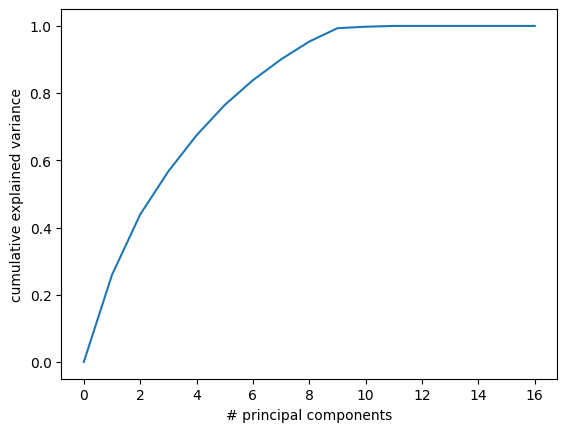

In [16]:
# 第一個位置為第一主成份的變異，所以要加 0 在第一個位置
var_plot = [0] + (famd.percentage_of_variance_/100).tolist()

import matplotlib.pyplot as plt
cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [17]:
# 根據上圖，選擇 6 個主成分(大約能解釋 8 成的差異)
famd = prince.FAMD(
    n_components=6,   # 設定想要保留的主成分數量
    random_state=42   
)

famd = famd.fit(df_encoded)

dir(famd)

# 從 FAMD 物件中取出座標
famd_coords = famd.row_coordinates(df_encoded);famd_coords

component,0,1,2,3,4,5
0,6.495655,-2.071025,5.006555,-1.505585,2.721960,-5.354744
1,-3.444759,-5.422368,-0.917585,1.497218,5.130423,-0.908483
2,1.565154,6.846466,-2.168928,2.257005,-1.659354,-0.759692
3,5.018543,-2.818080,-4.049772,-1.051086,-3.763759,0.295607
4,5.005150,-2.758181,-4.012185,-1.081230,-3.798519,0.246919
...,...,...,...,...,...,...
1995,-3.097466,6.068631,-1.321777,1.257586,-0.908136,0.547992
1996,-6.093483,-1.654561,-2.345371,-1.142167,1.939627,-0.320473
1997,4.387449,8.760748,1.568177,-3.127408,0.581352,1.671020
1998,-7.523240,3.423405,-0.360549,1.549042,-0.167539,0.274806


# Modeling

## HIERARCHICAL CLUSTERING(使用原始資料)

#### 流程
1. 初始化：首先，每個數據點都被視為一個單獨的聚類，因此初始時有 n 個聚類，其中 n 是數據點的數量。  
2. 合併：在每一步中，找出最相似的兩個聚類並合併它們。這將減少聚類的數量。  
3. 終止：重複第二步，直到所有的數據點都合併成一個單一的大聚類。通常，我們會在某個步驟停止，以得到一個合理的聚類數量。

In [18]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

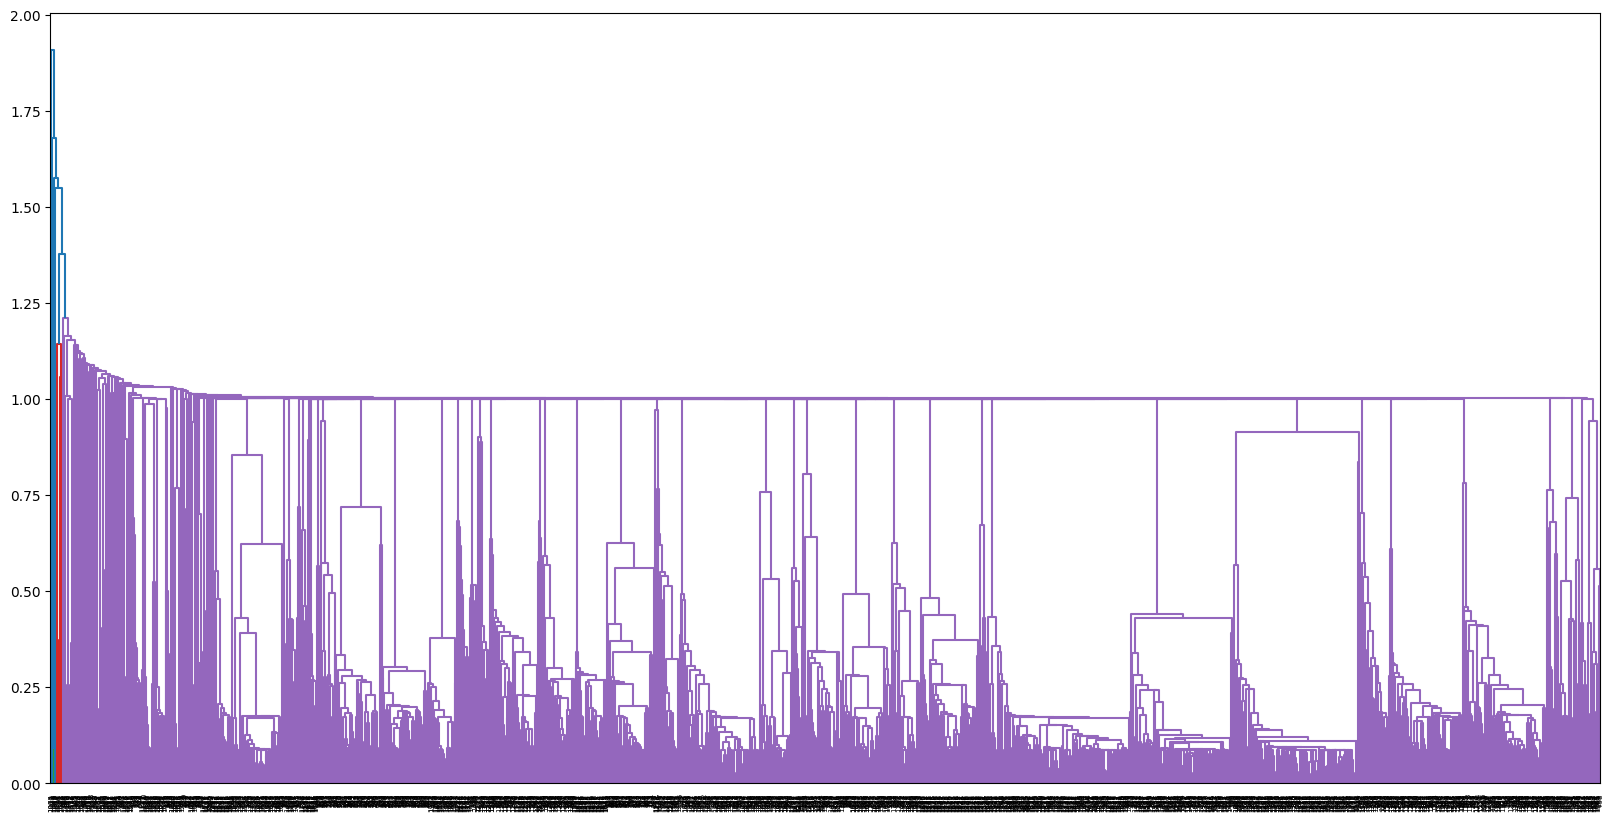

In [19]:
# Single linkage 衡量群體間最靠近的兩個點
plt.figure(figsize = (20,10))
mergings = linkage(df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

# 當使用 dendrogram 函數從 scipy 的 hierarchy 套件繪製樹狀圖時，圖形中的不同顏色代表不同的群。
# 這些顏色是根據高度（或距離）閾值自動選擇的，以使得當數據超過這個距離閾值時，它們不再被合併。

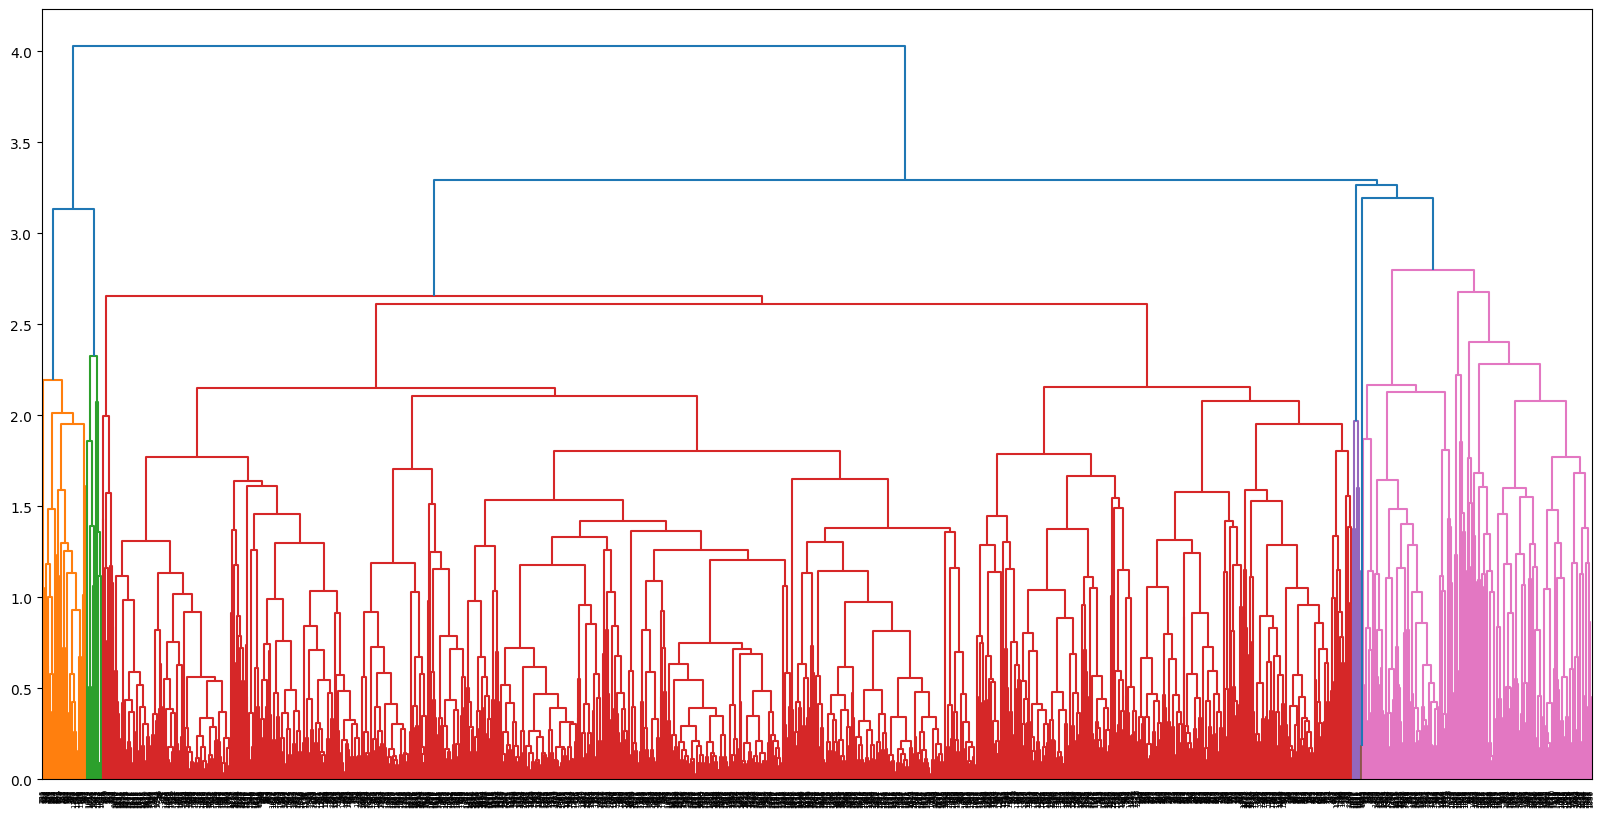

In [20]:
# Average linkage 衡量兩群體的各點間的平均距離
plt.figure(figsize = (20,10))
mergings = linkage(df, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

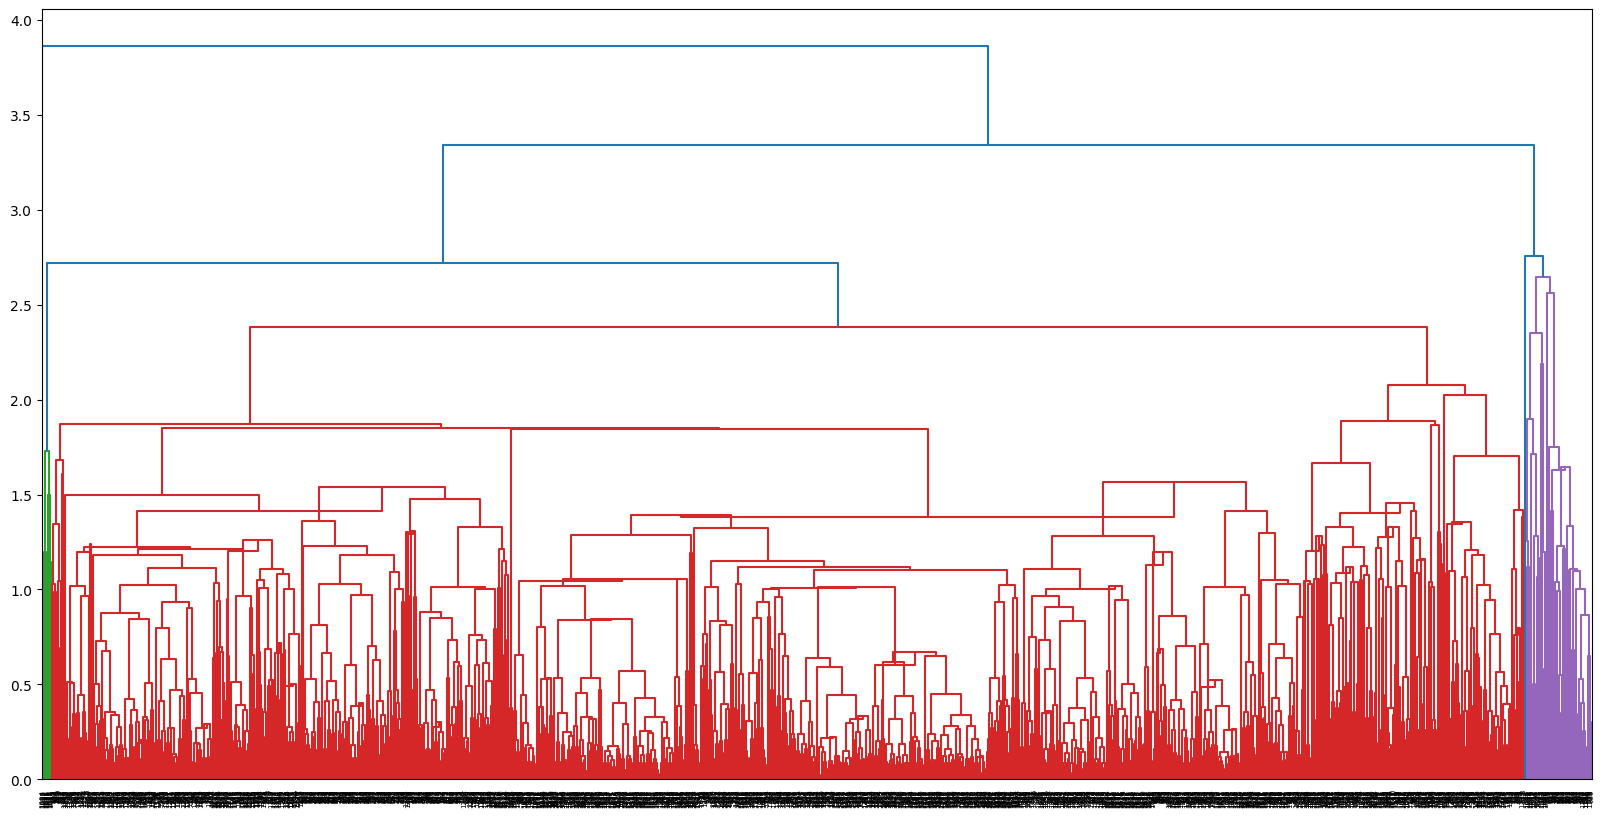

In [21]:
# Centroid linkage 衡量兩個群體中心點之間的距離
plt.figure(figsize = (20,10))
mergings = linkage(df, method='centroid', metric='euclidean')
dendrogram(mergings)
plt.show()

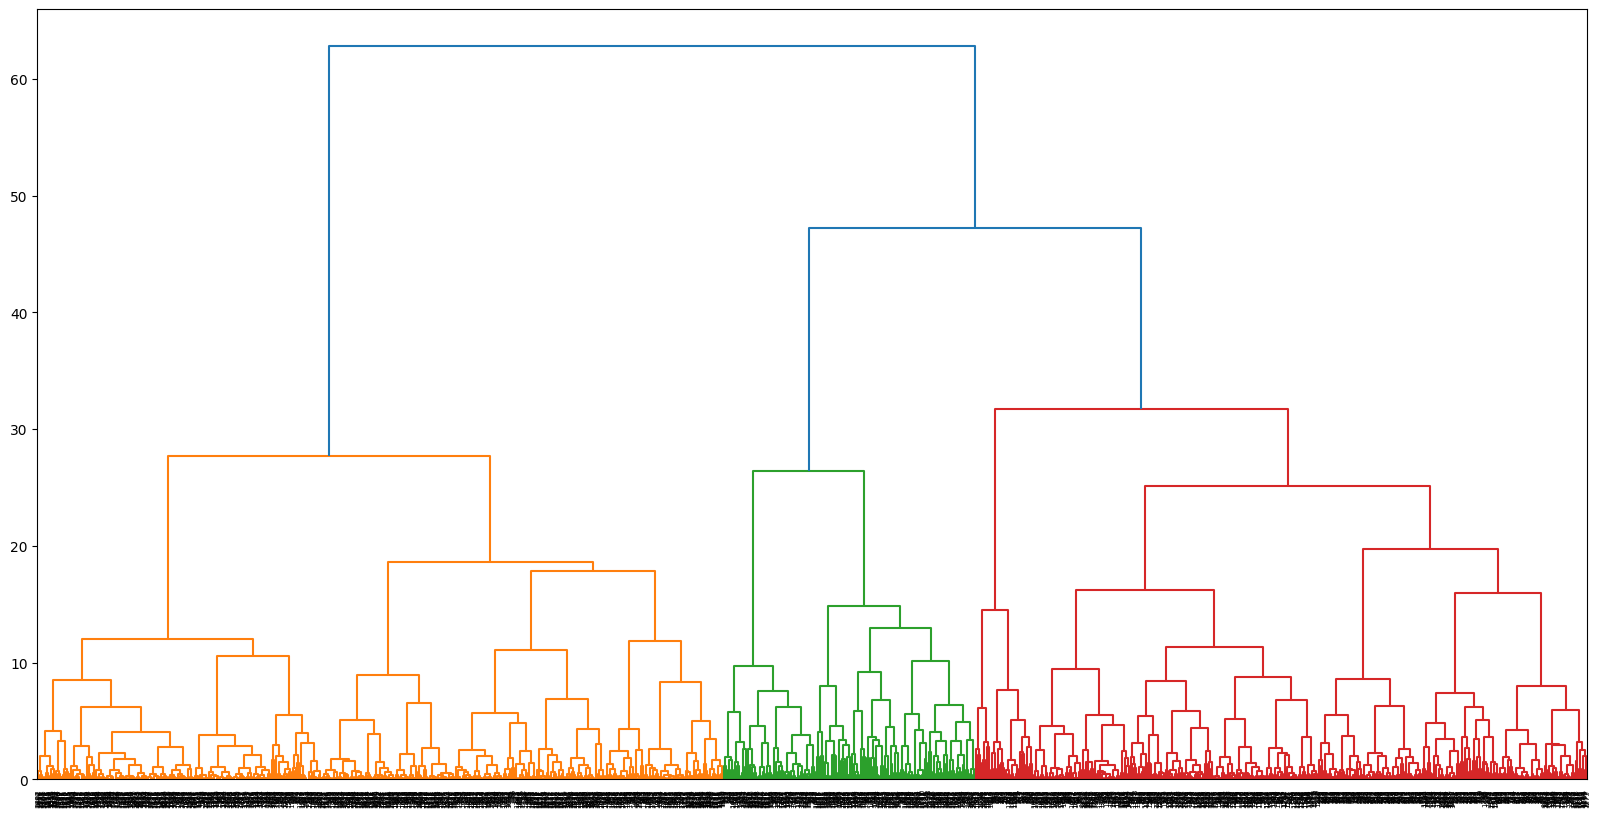

In [22]:
# Ward method (群間的距離定義為兩群合併後，各點到合併群中心的距離平方和)
plt.figure(figsize = (20,10))
mergings = linkage(df, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

### 分3群，且以 Ward method 分群效果最佳

In [23]:
# 3 clusters
h_cluster = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [24]:
# 衡量分群好壞
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 輪廓係數
# 輪廓係數（Silhouette Coefficient）是一種衡量聚類效果的指標。它結合了群內緊密度（cohesion）和群間分離度（separation）來提供對於每個數據點聚類質量的瞭解。
# 輪廓係數的值介於-1到1之間，其中1表示最佳的分群，0表示數據點重疊，-1表示不好的分群。
sil_score = silhouette_score(df, h_cluster)
print(f"Silhouette Score: {sil_score}")

# Davies-Bouldin Index
# Davies-Bouldin Index (DBI) 是一種用於評估聚類效果的指標。它基於每個群集的平均「緊密度」與該群集與其最近群集的「分離度」之間的比率。
# DBI的值越小，表示分群效果越好，因為這意味著群內距離小而群間距離大。
db_score = davies_bouldin_score(df, h_cluster)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.24688208161731603
Davies-Bouldin Index: 1.469163385893708


In [25]:
# 分群後結果
pred = pd.DataFrame(h_cluster, columns=['h_cluster'])
hierarchy_result = pd.concat([df.reset_index(drop=True), pred], axis=1)
hierarchy_result

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,h_cluster
0,0,0,2.653614,2,0.097524,1,2,0
1,1,1,-1.187132,1,0.782654,1,2,1
2,0,0,1.117316,1,-0.833202,0,0,2
3,0,0,0.775916,1,1.328386,1,1,1
4,0,0,1.458716,1,0.736932,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0,0
1996,1,1,-0.760382,1,-0.084265,1,0,2
1997,0,0,-0.418983,0,-0.906957,0,0,2
1998,1,1,-1.016432,1,-0.603329,0,0,2


In [26]:
# 每一群個數
pred.value_counts()

h_cluster
2            885
1            789
0            326
Name: count, dtype: int64

###  HC result analysis(原始資料)

In [27]:
hierarchy_result.groupby(['h_cluster'], as_index=True).mean()[['Age','Income']]

,Age,Income
h_cluster,,
0,1.536735,0.406236
1,-0.048917,0.536627
2,-0.522464,-0.628058


##### Sex：  
0：男性  1：女性

##### Marital status：客戶的婚姻狀況
0：單人  1：非單身（離婚/分居/已婚/喪偶）

##### Age：客戶的年齡（以年為單位）

##### Education：客戶的教育水準
0：其他/未知  1：高中  2：大學  3：研究生院

##### Income：客戶以美元自我報告的年收入

##### Occupation ：客戶的職業類別
0：失業 / unskilled  1：skilled employee / official  2：management / self-employed / highly qualified employee / officer

##### Settlement size：客戶居住城市的規模
0：小城市  1：中等城市  2：大城市

In [28]:
hierarchy_result_categorical = hierarchy_result.drop(['Age', 'Income'], axis=1)

# 觀察第 0 群分布情況
hierarchy_result_categorical[hierarchy_result_categorical['h_cluster'] == 0].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2,3
Sex,131.0,195.0,NaN,NaN
Marital status,108.0,218.0,NaN,NaN
Education,NaN,19.0,271.0,36.0
Occupation,116.0,153.0,57.0,NaN
Settlement size,147.0,98.0,81.0,NaN


##### 第0群特徵:年紀大、收入偏高、非單身偏多、教育程度高、已退休或官員

### 第 0 群可理解為教育程度較高、年紀較大、收入偏高的客群(可能是官員或退休人士)

In [29]:
# 觀察第 1 群分布情況
hierarchy_result_categorical[hierarchy_result_categorical['h_cluster'] == 1].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2
Sex,645.0,144.0,NaN
Marital status,563.0,226.0,NaN
Education,152.0,619.0,18.0
Occupation,31.0,561.0,197.0
Settlement size,81.0,322.0,386.0


##### 第1群特徵:中年、收入高、多為男性、單身偏多、教育程度不高、職業多為技術員工或官員、多居住於中大型城市

### 第 1 群主要為職業是 skilled employee / official 的男性客群(可能是中年技術員工)

In [30]:
# 觀察第 2 群分布情況
hierarchy_result_categorical[hierarchy_result_categorical['h_cluster'] == 2].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2
Sex,310.0,575.0,NaN
Marital status,336.0,549.0,NaN
Education,135.0,748.0,2.0
Occupation,486.0,399.0,NaN
Settlement size,761.0,124.0,NaN


##### 第2群特徵:年紀小、收入較低、已婚女性稍多、教育程度多為高中、多為失業或技術員工、主要居住於小城市

### 第 2 群主要為居住在小城市的年輕客群，收入較低(可能是剛畢業的新鮮人)

### 使用 Gower 計算距離(適合混合型數據)

In [31]:
# !pip install gower
import gower
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# 計算 Gower 距離矩陣
gower_dist_matrix = gower.gower_matrix(df)

# 將方形距離矩陣轉換為縮減形式
reduced_gower_dist = squareform(gower_dist_matrix)

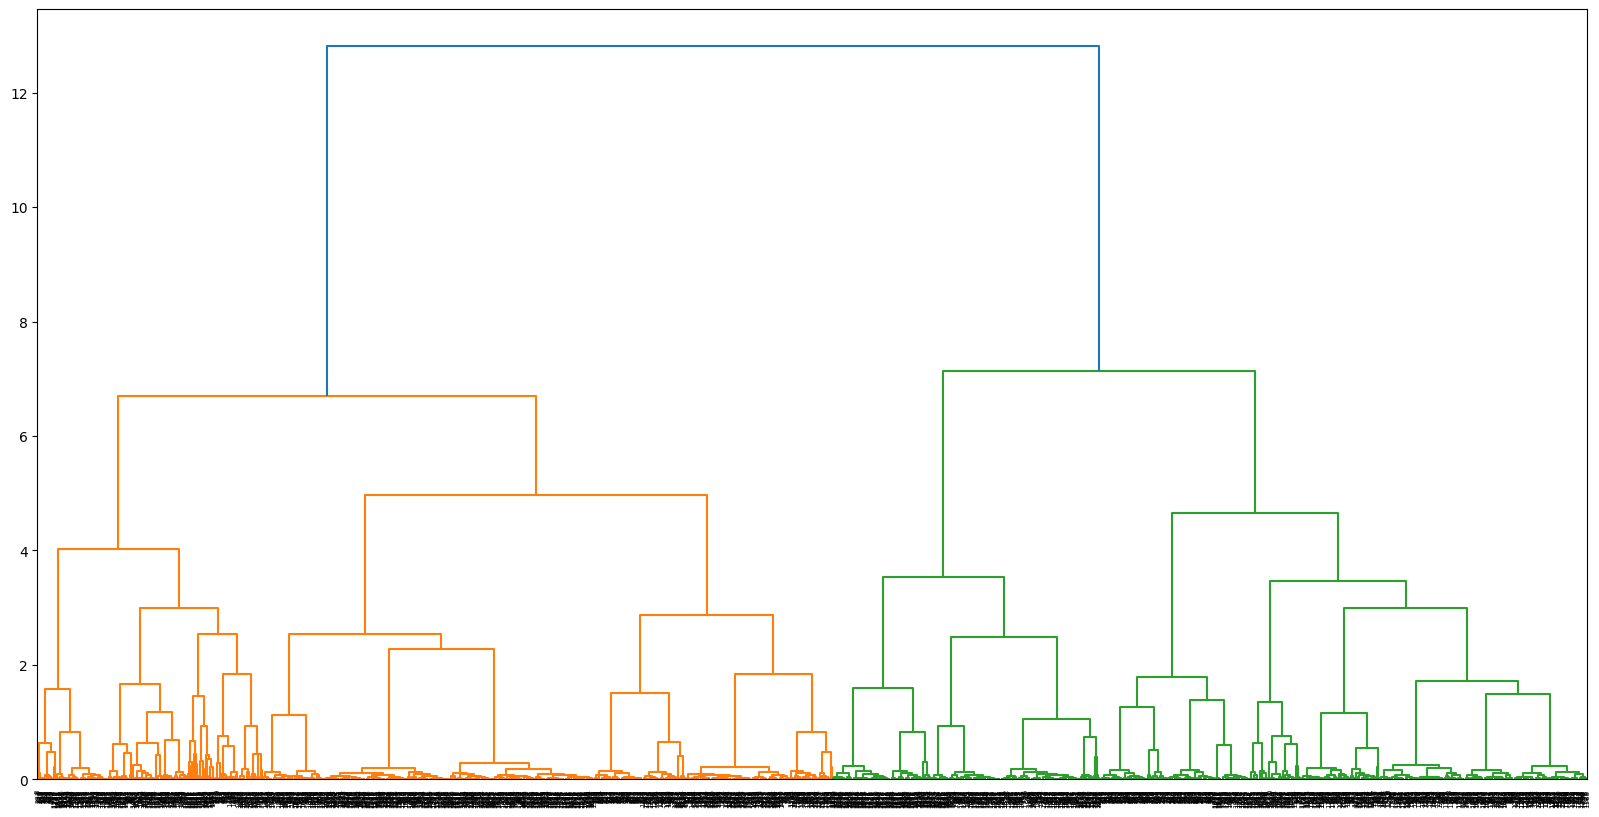

In [32]:
# 使用 Gower 距離矩陣進行層次聚類
mergings = linkage(reduced_gower_dist, method='ward')

# 繪製樹狀圖
plt.figure(figsize=(20,10))
dendrogram(mergings)
plt.show()

## HIERARCHICAL CLUSTERING(使用降維資料)(不再是混合型資料)

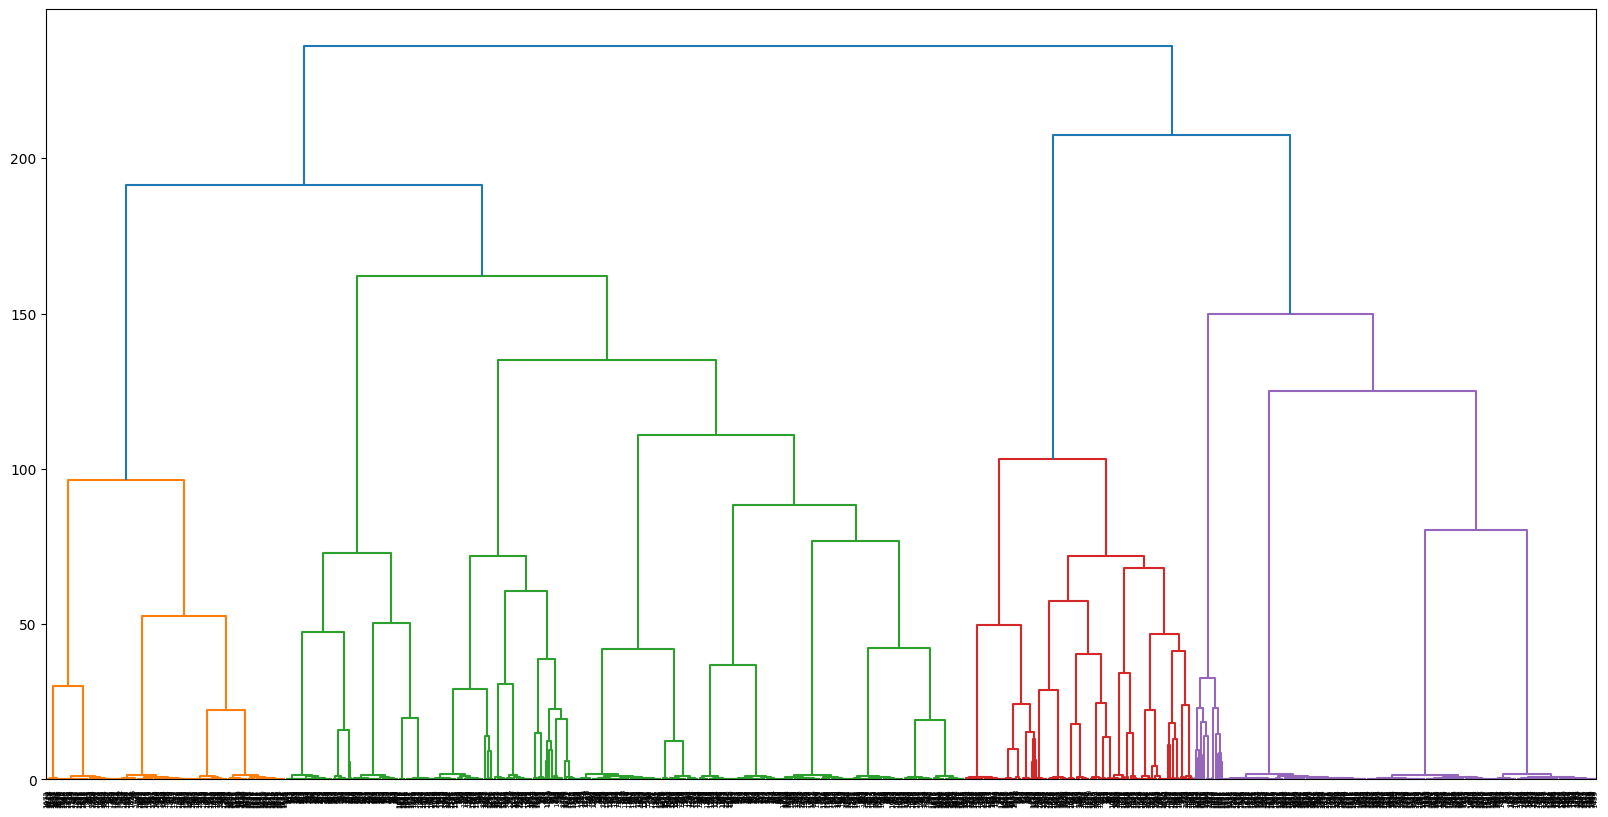

In [33]:
# ward method
plt.figure(figsize = (20,10))
mergings = linkage(famd_coords, method='ward', metric='euclidean')
dendrogram(mergings)
plt.show()

In [34]:
# 分 4 群
h_cluster = cut_tree(mergings, n_clusters=4).reshape(-1, )

In [35]:
# 衡量分群好壞
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 輪廓係數
# 輪廓係數（Silhouette Coefficient）是一種衡量聚類效果的指標。它結合了群內緊密度（cohesion）和群間分離度（separation）來提供對於每個數據點聚類質量的瞭解。
# 輪廓係數的值介於-1到1之間，其中1表示最佳的分群，0表示數據點重疊，-1表示不好的分群。
sil_score = silhouette_score(df, h_cluster)
print(f"Silhouette Score: {sil_score}")

# Davies-Bouldin Index
# Davies-Bouldin Index (DBI) 是一種用於評估聚類效果的指標。它基於每個群集的平均「緊密度」與該群集與其最近群集的「分離度」之間的比率。
# DBI的值越小，表示分群效果越好，因為這意味著群內距離小而群間距離大。
db_score = davies_bouldin_score(df, h_cluster)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.16360461906062881
Davies-Bouldin Index: 1.5601001475596432


In [36]:
# 分群後結果
pred = pd.DataFrame(h_cluster, columns=['h_cluster'])
hierarchy_result_dreduction = pd.concat([df.reset_index(drop=True), pred], axis=1)
hierarchy_result_dreduction

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,h_cluster
0,0,0,2.653614,2,0.097524,1,2,0
1,1,1,-1.187132,1,0.782654,1,2,1
2,0,0,1.117316,1,-0.833202,0,0,2
3,0,0,0.775916,1,1.328386,1,1,1
4,0,0,1.458716,1,0.736932,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0,2
1996,1,1,-0.760382,1,-0.084265,1,0,3
1997,0,0,-0.418983,0,-0.906957,0,0,2
1998,1,1,-1.016432,1,-0.603329,0,0,3


In [37]:
# 每一群個數
pred.value_counts()

h_cluster
1            876
3            518
2            309
0            297
Name: count, dtype: int64

### HC result analysis(降維資料)

In [38]:
hierarchy_result_dreduction.groupby(['h_cluster'], as_index=True).mean()[['Age','Income']]

,Age,Income
h_cluster,,
0,1.494637,0.653349
1,-0.140231,0.319004
2,-0.180887,-0.939016
3,-0.511912,-0.353932


In [39]:
hierarchy_result_dreduction_categorical = hierarchy_result_dreduction.drop(['Age', 'Income'], axis=1)

# 觀察第 0 群分布情況
hierarchy_result_dreduction_categorical[hierarchy_result_dreduction_categorical['h_cluster'] == 0].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2
Sex,142.0,155.0,NaN
Marital status,103.0,194.0,NaN
Education,6.0,NaN,291.0
Occupation,96.0,133.0,68.0
Settlement size,117.0,101.0,79.0


##### 第0群特徵:年紀大、收入高、教育程度大學

### 第0群可能為收入較高的長輩

In [40]:
# 觀察第 1 群分布情況
hierarchy_result_dreduction_categorical[hierarchy_result_dreduction_categorical['h_cluster'] == 1].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2
Sex,726.0,150.0,NaN
Marital status,635.0,241.0,NaN
Education,192.0,684.0,NaN
Occupation,33.0,668.0,175.0
Settlement size,200.0,302.0,374.0


##### 第1群特徵:青壯年、收入偏高、多為男性、多為單身、教育程度高中、職業多為技術員工/官員

### 第一群可能是青壯年收入高的單身男性

In [41]:
# 觀察第 2 群分布情況
hierarchy_result_dreduction_categorical[hierarchy_result_dreduction_categorical['h_cluster'] == 2].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1
Sex,211.0,98.0
Marital status,267.0,42.0
Education,89.0,220.0
Occupation,309.0,NaN
Settlement size,309.0,NaN


##### 第2群特徵:年紀偏小、收入低、男性偏多、大多單身、學歷高中、失業或未就業、居住於小城市

### 第2群可能是青年失業族群

In [42]:
# 觀察第 3 群分布情況
hierarchy_result_dreduction_categorical[hierarchy_result_dreduction_categorical['h_cluster'] == 3].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2,3
Sex,7.0,511.0,NaN,NaN
Marital status,2.0,516.0,NaN,NaN
Education,NaN,482.0,NaN,36.0
Occupation,195.0,312.0,11.0,NaN
Settlement size,363.0,141.0,14.0,NaN


##### 第3群特徵:年紀最小、收入低、多為女性、非單身、學歷多為高中、職業為技術員工/官員、多居住於小城市

### 第3群可能為年輕已婚女性

# K-Means

#### 運作流程：

1. 初始化：選擇 K 個數據點作為初始的群中心。這可以是隨機選擇，或者使用某些特定的方法。
2. 分配數據點：對於數據集中的每一個數據點，根據它與群中心的距離將其分配到最近的群中。
3. 重新計算中心：對於每一個群，計算所有分配到該群的數據點的均值，並將這個均值設定為新的群中心。
4. 重複：重複步驟 2 和 3，直到群中心不再發生明顯的變化或達到預定的迭代次數。

### 使用原始資料

#### 手肘法則（ElbowMethod）

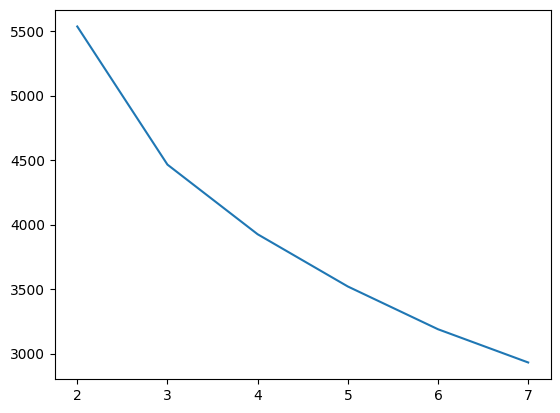

In [43]:
from sklearn.cluster import KMeans
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50,n_init=1000)
    model_clus.fit(df)
    ssd.append(model_clus.inertia_)

plt.plot(clusters, ssd);

#### 輪廓係數法（Silhouette Coefficient）
「找出相同群凝聚度越小、不同群分離度越高」的值     
* 凝聚度（a）是指與相同群內的其他點的平均距離。
* 分離度（b）是指與不同群的其他點的平均距離。 

* 輪廓的取值範圍為[-1, +1]，越接近1表示聚類效果越好，越接近-1表示聚類效果越差；如果輪廓近似為0，則說明該樣本在兩個群的邊界上。   

In [44]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100,n_init=1000)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2903024459937869
For n_clusters=3, the silhouette score is 0.2584011979569013
For n_clusters=4, the silhouette score is 0.24189542169677247
For n_clusters=5, the silhouette score is 0.2132168141173833
For n_clusters=6, the silhouette score is 0.22068396309358596
For n_clusters=7, the silhouette score is 0.2293486281358914
For n_clusters=8, the silhouette score is 0.23676245752516964


### 使用降維資料

#### 手肘法則（ElbowMethod）

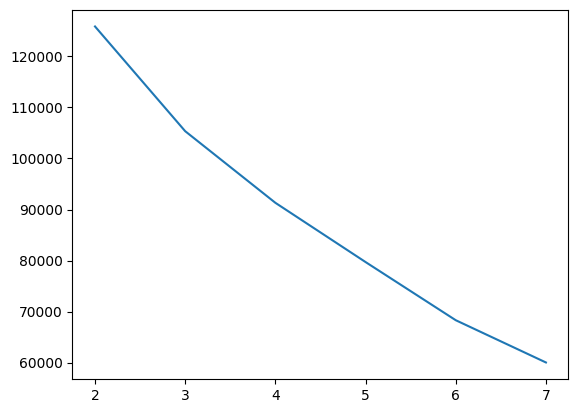

In [45]:
from sklearn.cluster import KMeans
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50,n_init=1000)
    model_clus.fit(famd_coords)
    ssd.append(model_clus.inertia_)

plt.plot(clusters, ssd);

#### 輪廓係數法（Silhouette Coefficient）

In [46]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 50,n_init=1000)
    kmeans.fit(famd_coords)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(famd_coords, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.26575984202680014
For n_clusters=3, the silhouette score is 0.2782948584211227
For n_clusters=4, the silhouette score is 0.30506185639934164
For n_clusters=5, the silhouette score is 0.326803760688052
For n_clusters=6, the silhouette score is 0.35210843250642176
For n_clusters=7, the silhouette score is 0.3704252467979708
For n_clusters=8, the silhouette score is 0.38565893522294264
For n_clusters=9, the silhouette score is 0.4224403070162949
For n_clusters=10, the silhouette score is 0.4457711196289666


### 由上述結果發現，k-means方法在決定群數時，不論在原始資料還是降維資料中都難以決定

#### 使用HC分4群的結果，當作k-means的群數

In [47]:
cluster = KMeans(n_clusters = 4, random_state = 111,n_init=1000)
cluster.fit(famd_coords)

KMeans(n_clusters=4, n_init=1000, random_state=111)

In [48]:
# 計算每群數量
pd.Series(cluster.labels_).value_counts()

0    640
3    570
2    526
1    264
Name: count, dtype: int64

In [49]:
# 分群後結果
pred = pd.DataFrame(cluster.labels_, columns=['k_cluster'])
kmeans_result = pd.concat([df.reset_index(drop=True), pred], axis=1)
kmeans_result

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,k_cluster
0,0,0,2.653614,2,0.097524,1,2,3
1,1,1,-1.187132,1,0.782654,1,2,0
2,0,0,1.117316,1,-0.833202,0,0,2
3,0,0,0.775916,1,1.328386,1,1,3
4,0,0,1.458716,1,0.736932,1,1,3
...,...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0,2
1996,1,1,-0.760382,1,-0.084265,1,0,0
1997,0,0,-0.418983,0,-0.906957,0,0,3
1998,1,1,-1.016432,1,-0.603329,0,0,2


In [56]:
# 衡量分群好壞
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 輪廓係數
# 輪廓係數（Silhouette Coefficient）是一種衡量聚類效果的指標。它結合了群內緊密度（cohesion）和群間分離度（separation）來提供對於每個數據點聚類質量的瞭解。
# 輪廓係數的值介於-1到1之間，其中1表示最佳的分群，0表示數據點重疊，-1表示不好的分群。
sil_score = silhouette_score(kmeans_result, h_cluster)
print(f"Silhouette Score: {sil_score}")

# Davies-Bouldin Index
# Davies-Bouldin Index (DBI) 是一種用於評估聚類效果的指標。它基於每個群集的平均「緊密度」與該群集與其最近群集的「分離度」之間的比率。
# DBI的值越小，表示分群效果越好，因為這意味著群內距離小而群間距離大。
db_score = davies_bouldin_score(kmeans_result, h_cluster)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.1041102946098703
Davies-Bouldin Index: 1.7730515901737853


In [50]:
kmeans_result.groupby(['k_cluster'], as_index=True).mean()[['Age','Income']]

,Age,Income
k_cluster,,
0,-0.282556,0.022789
1,0.443892,1.375477
2,-0.000671,-0.812703
3,0.112283,0.087317


In [51]:
kmeans_result_categorical = kmeans_result.drop(['Age', 'Income'], axis=1)

# 觀察第 0 群分布情況
kmeans_result_categorical[kmeans_result_categorical['k_cluster'] == 0].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2,3
Sex,152.0,488.0,NaN,NaN
Marital status,53.0,587.0,NaN,NaN
Education,NaN,529.0,97.0,14.0
Occupation,5.0,635.0,NaN,NaN
Settlement size,270.0,235.0,135.0,NaN


In [52]:
# 觀察第 1 群分布情況
kmeans_result_categorical[kmeans_result_categorical['k_cluster'] == 1].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2,3
Sex,205.0,59.0,NaN,NaN
Marital status,154.0,110.0,NaN,NaN
Education,26.0,156.0,65.0,17.0
Occupation,12.0,2.0,250.0,NaN
Settlement size,11.0,101.0,152.0,NaN


In [54]:
# 觀察第 2 群分布情況
kmeans_result_categorical[kmeans_result_categorical['k_cluster'] == 2].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2,3
Sex,168.0,358.0,NaN,NaN
Marital status,230.0,296.0,NaN,NaN
Education,23.0,411.0,87.0,5.0
Occupation,523.0,NaN,3.0,NaN
Settlement size,524.0,2.0,NaN,NaN


In [55]:
# 觀察第 3 群分布情況
kmeans_result_categorical[kmeans_result_categorical['k_cluster'] == 3].iloc[:,:5].apply(lambda x: x.value_counts(), axis = 0).T

,0,1,2
Sex,561.0,9.0,NaN
Marital status,570.0,NaN,NaN
Education,238.0,290.0,42.0
Occupation,93.0,476.0,1.0
Settlement size,184.0,206.0,180.0
